# Исследование объявлений о продаже квартир


## Введение

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='	')
data.info()
len_old = data.shape[0] #длина исходного датафрейма
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


На основе сводки видно, что ключевых данных для анализа рыночной стоимости (цена,площадь,число комнат) хватает в полном объеме.
*****
Вывод гистрограммы датафрейма `data` на экран.

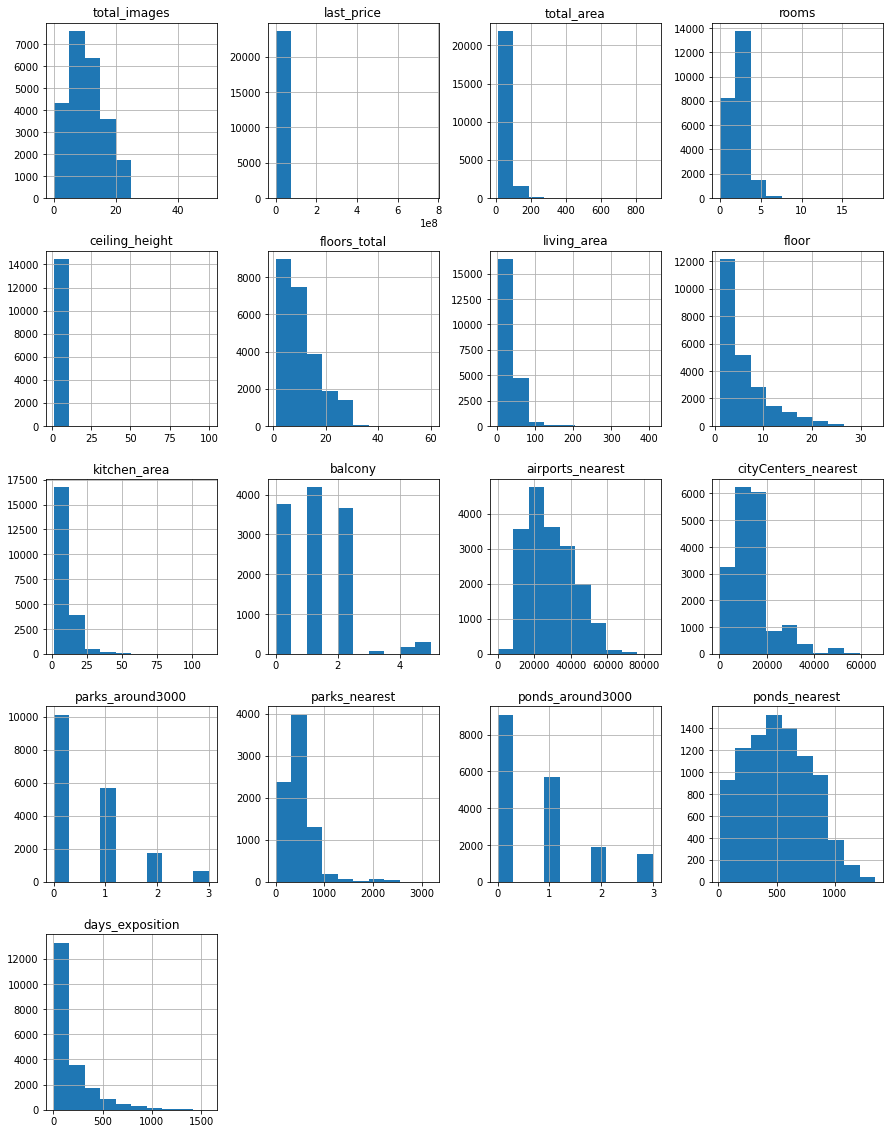

In [3]:
data.hist(figsize=(15, 20));

По многим гистрограммам видно наличие выбросов некоторых значений.

## Предобработка данных

### Изучение пропусков
Распределение пропущенных значений по колонкам отражено в пункте 1 при вызове функции info. 
В столбцах с balcony и is_apartment отсутствующие значения вероятнее всего означают логический ноль. Заполняем эти значения.

In [4]:
data['balcony'].fillna(value=False, inplace=True)
data['is_apartment'].fillna(value=False, inplace=True)
#заполняем пропуски количества этажей в доме присваиванием этажа квартиры+1
data['floors_total'] = data['floors_total'].where(data['floors_total']==data['floors_total'], data.floor+1)
#вычисляем коэффициенты жилой и кухонной площади
ratio_liv = data['living_area'].median() / data['total_area'].median() # средний коэф площадь кухни/общей
ratio_kit = data['kitchen_area'].median() / data['total_area'].median()
#Заполняем пропуски 
data['living_area'] = data['living_area'].where(data['living_area']==data['living_area'], data.total_area*ratio_liv )
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area']==data['kitchen_area'], data.total_area*ratio_kit )

Т.к. у исходного дата-фрейма два источника информации, то причины появления пропусков следует рассматривать для каждого источника отдельно. 
Для данных которые вносит пользователь основной причиной пропусков является незнание параметров дома(площади, высоты потолков) или же нестандартная квартира(дом), где площадь кухни не выделена однозначно.
Для второго источника характерны программные проблемы в определении растояния, т.к. количество парков и водоемов посчитано в радиусе 3 км., но растояние до ближайшего не вычислено. Из-за отсутствия маски при вводе населенного пункта наблюдаются неточности при вводе данных.

### Изменение типов данных

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

Столбцы first_day_exposition,floors_total,balcony имеют неподходящий тип данных для той информации, которую они содержат.

### Устраняем неявные дубликаты

In [6]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')

Устраняем дубликаты путем сведения названий к единообразному списку

### Устраняем редкие и неявные значения

In [7]:
data.loc[(20<=data.ceiling_height)&(data.ceiling_height<45),'ceiling_height'] = data.ceiling_height/10
data.loc[(data.ceiling_height<=2)|(data.ceiling_height>=4.5),'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna((data['ceiling_height'].mean() )) #Заполняем пропуски медианой

for_del = list(data.query('(last_price>50000000) | (total_area>200) | (rooms>7)' ).index) #отсеиваем сверхэлитное жилье
data.drop(labels=for_del, axis=0, inplace=True) #удалям сверхэлитное жилье

print('Потеря информации:', round((len_old-data.shape[0])/data.shape[0]*100,2),'%') #потери информации

Потеря информации: 1.2 %


Обрабатываем значения с пропущенной точкой в первой строке. Во второй строке заполняем выбросы значений медианным значением. Исключены предложения дороже 50млн.руб или площадью более 200кв.м. или с количеством комнат более 7.

### Посчитайте и добавьте в таблицу новые столбцы

In [8]:
data['per_metr'] = round(data['last_price'] / data['total_area']) #цена за метр

data['weekday'] = data['first_day_exposition'].dt.weekday #день недели
data['month'] = data['first_day_exposition'].dt.month #месяц
data['year'] = data['first_day_exposition'].dt.year #год
#тип этажа определяется следующими строками:
data['type_floor'] = 'другой' 
data['type_floor'] = data['type_floor'].where(data['floor']!=1,'первый' )
data['type_floor'] = data['type_floor'].where(data['floor']!=data['floors_total'],'последний' )
#растояние до центра из м в км:
data.loc[:,'cityCenters_nearest'] = round(data.cityCenters_nearest/1000)

Добавлены новые столбцы - цена за метр, день, месяц и год размещения объявления, тип этажа. Растояние до центра города переведено из метров в километры.

## Исследовательский анализ данных(гистрограммы)

### Гистрограмма общей площади

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

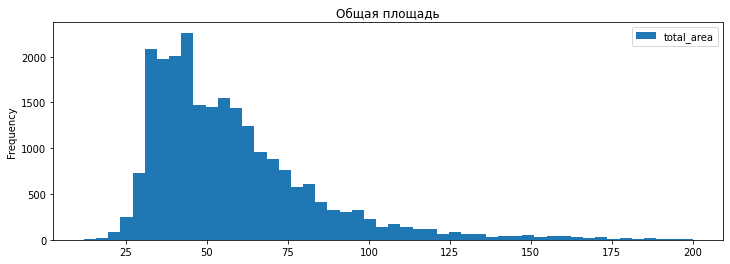

In [9]:
data.plot(y='total_area', kind='hist',bins=50,title='Общая площадь',figsize=(12,4))

Основная масса предложений имеет площадь до 125кв.м. В диапазоне от 125 и до верхней границы выборки представлено мало предложений квартир

164.7

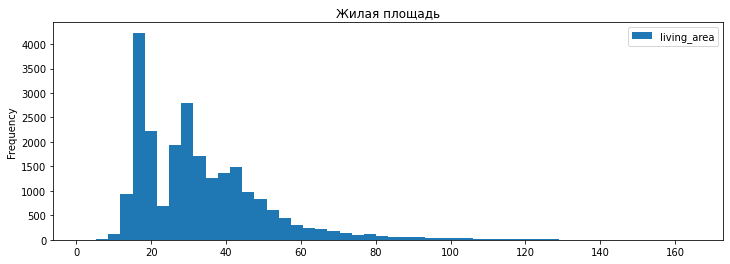

In [10]:
data.plot(y='living_area', kind='hist',bins=50,title='Жилая площадь',figsize=(12,4))
data['living_area'].max()

Основная масса предложений имеет жилую площадь до 60кв.м. В диапазоне от 60 до 170 кв.м. представлено мало предложений.

### Гистрограмма распределения площади кухни

75.0

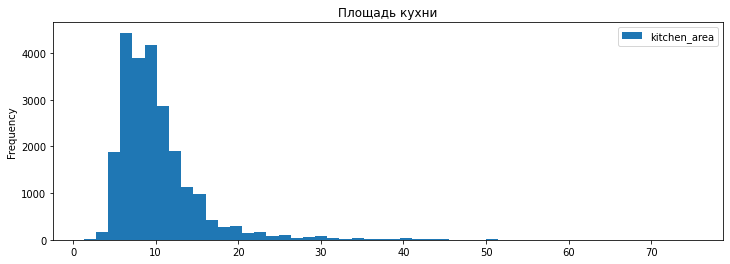

In [11]:
data.plot(y='kitchen_area', kind='hist',bins=50,title='Площадь кухни',figsize=(12,4))
data['kitchen_area'].max()

Подавляющее большинство предложений имеет кухню площадью 10-15кв.м. Выделяется квартира с кухней 75кв.м.

### Гистрограмма распределения цены предложений

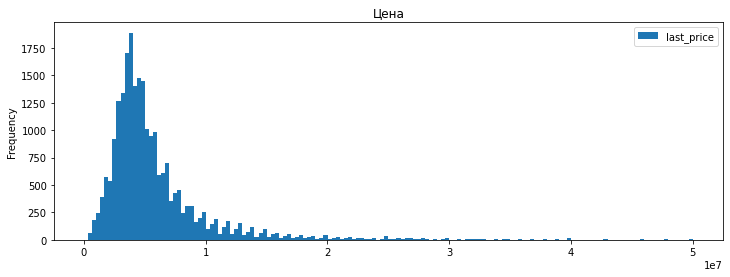

In [12]:
data.plot(y='last_price', kind='hist',bins=150,title='Цена',figsize=(12,4),);

Цена распределена неравномерно. Большинство квартир имеет стоимость, приближенную к левой границе. При этом ряд элитных квартир мешают отображению графика. За 50 млн руб. имеется всего 6 предложений жилья. 

### Гистрограмма распределения количества комнат

7

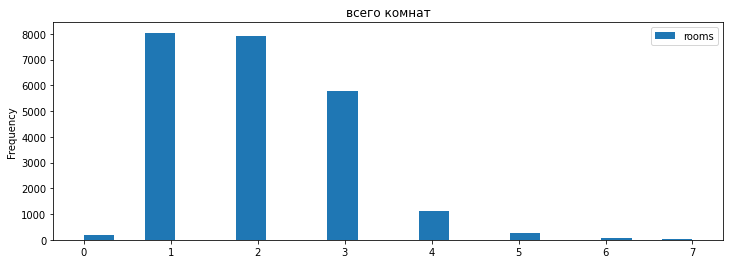

In [13]:
data.plot(y='rooms', kind='hist',bins=20,title='всего комнат',figsize=(12,4))
data['rooms'].max()

Количество предложений одно- и двухкомантных квартир одинаково. Немного меньше предложений трехкомнтаных квартир. Большее число комнат встречается намного реже. Самое большое количество комнат на рынке - 7. Это число мы ограничили в нашем датафрейме. 

### Гистрограмма распределения высоты потолков

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

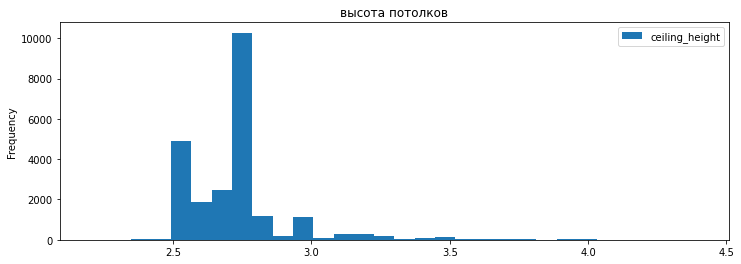

In [14]:
data.plot(y='ceiling_height', kind='hist',bins=30,title='высота потолков',figsize=(12,4))

Большиство квартир имеют потолки 2.5-2.8 метра. Второй пик наблюдается у квартир с потолками 3м. Остальные варианты редки.  

### Гистрограмма распределения по этажам

33

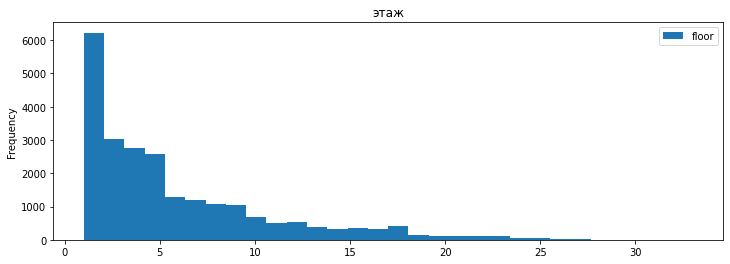

In [15]:
data.plot(y='floor', kind='hist',bins=30,title='этаж',figsize=(12,4))
data['floor'].max()

Большинство предложений расположены на 1 этаже, вдвое реже квартиры располагаются на 2,3,4 и 5 этажах. Самая высокая квартира расположена на 33 этаже.

### Гистрограмма распределения типов этажей

<AxesSubplot:title={'center':'Тип расположения'}, ylabel='Frequency'>

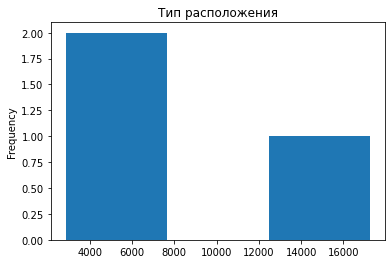

In [16]:
data['type_floor'].value_counts().plot(kind='hist',bins=3,title='Тип расположения')

Квартир на первом этаже вдвое больше чем квартир на последнем этаже.

### Гистрограмма распределения высоты домов

60

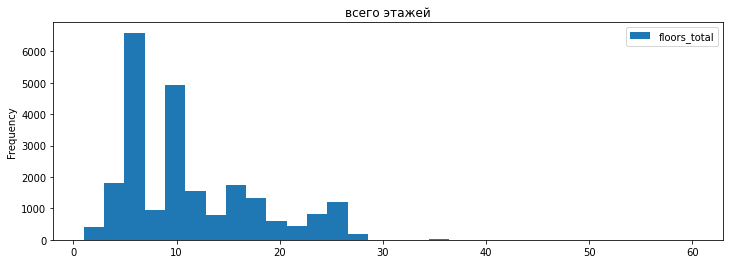

In [17]:
data.plot(y='floors_total', kind='hist',bins=30,title='всего этажей',figsize=(12,4))
data['floors_total'].max()

Самое высокое здание, где можно купить квартиру, имеет высоту 60 метров. На гистрограмме видно наличие нескольких пиков, которые отражают в основном год постройки:
  * 5 этажей - для домов "пятиэтажек";
  * 9 этажей - для домов "девятиэтажек";
  *  16 этажей - для домов поздней брежневской эпохи;
  *  25 этажей - для современных новостроек.


### Гистрограмма распределения количества предложений в зависимости от расстояния

66.0

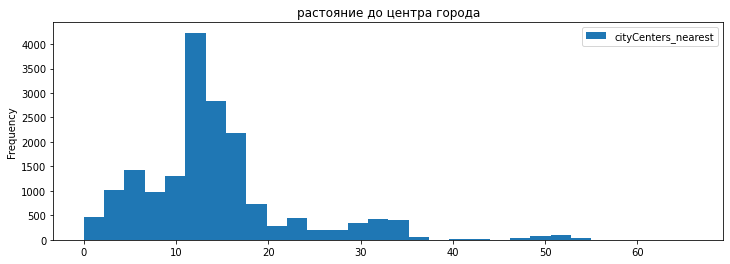

In [18]:
data.plot(y='cityCenters_nearest', kind='hist',bins=30,title='растояние до центра города',figsize=(12,4))
data['cityCenters_nearest'].max()

Самое большое предложение квартир располагается в диапазоне от 12 до 16 км. до центра, что связано с застройкой окраин города. Дальше 18 км. резко сокращается количество предложений. Самое отдаленное от центра предложение располагается в 66 км.

### Гистрограмма распределения расстояния до парка

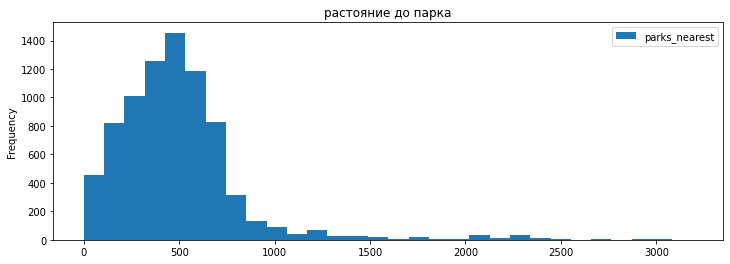

In [19]:
data.plot(y='parks_nearest', kind='hist',bins=30,title='растояние до парка',figsize=(12,4));

На гистрограмме видно, что для большей части предложений парки расположены в шаговой достпупности. 

### Гистрограмма распределения дня недели размещения объявления

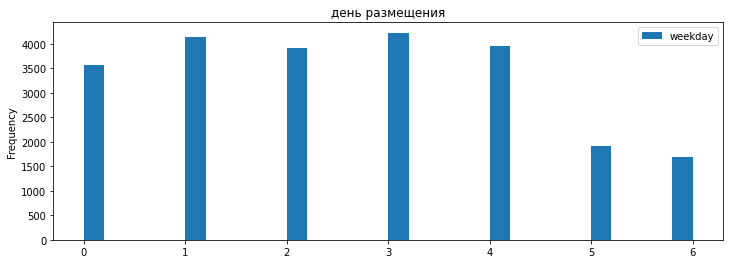

In [20]:
data.plot(y='weekday', kind='hist',bins=30,title='день размещения',figsize=(12,4));


В субботу и воскресенье вдвое реже выклаывают объявление, чем в будние дни. 

### Гистрограмма распределения месяцев размещения объявления

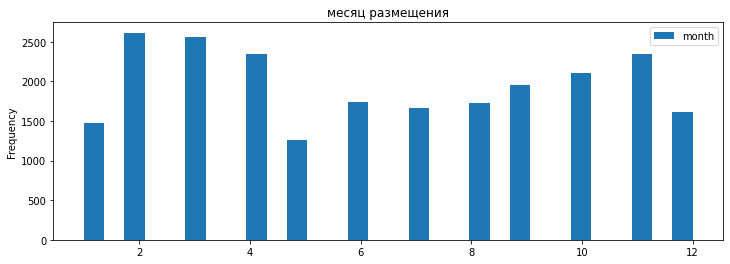

In [21]:
data.plot(y='month', kind='hist',bins=30,title='месяц размещения',figsize=(12,4));

На графике видно, что наименее активно размещают объявления в январе и мае, а чаще всего в феврале, марте, апреле и ноябре. 

### Гистрограмма скорости продажи объектов

179.44172987882968
95.0


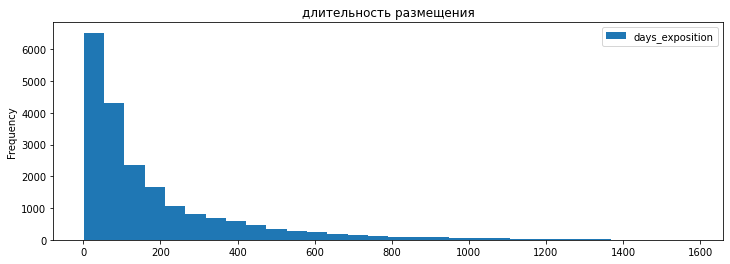

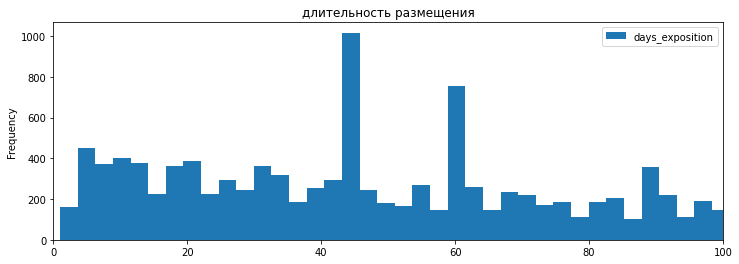

In [22]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())
data.plot(y='days_exposition', kind='hist',bins=30,title='длительность размещения',figsize=(12,4));
data.plot(y='days_exposition', kind='hist',bins=600,title='длительность размещения',figsize=(12,4),xlim=(0,100));

Большая часть объявлений снималась с размещения по истечении полугода, при этом в первые месяцы была наибольшая доля продаж. 
Среднее арифмитическое значение продажи равно 180 дням, а медианное 95 дням. Быстрой продажей можно назвать срок до 200 дней, а все что дольше - долгой. 

## Исследовательский анализ данных(зависимости)

### Отображение зависимости площади от стоимости объекта

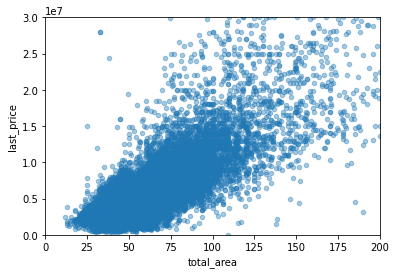

In [23]:
data.plot(x='total_area', y='last_price', kind='scatter',ylim=(0,30000000),xlim=(0,200),alpha=0.4);

Прослеживается положительная линейная зависимость между ценой и площадью жилья. 

### Отображение зависимости жилой площади от стоимости объекта

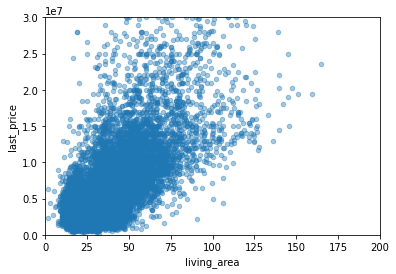

In [24]:
data.plot(x='living_area', y='last_price', kind='scatter',ylim=(0,30000000),xlim=(0,200),alpha=0.4); 

Также прослеживается положительная линейная зависимость между ценой и жилой площадью. Тенденция во многом отражает зависимость выше.

### Отображение зависимости площади кухни от стоимости объекта

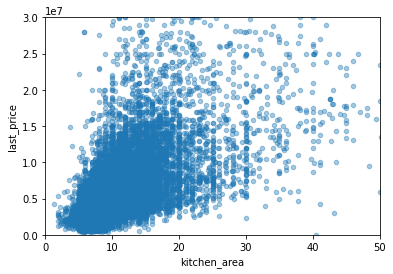

In [25]:
data.plot(x='kitchen_area', y='last_price', kind='scatter',ylim=(0,30000000),xlim=(0,50),alpha=0.4); 

Аналогично прослеживается положительная линейная зависимость между ценой и площадью кухни. Тенденция во многом отражает зависимость выше. 

### График зависимости количества комнат от стоимости объекта

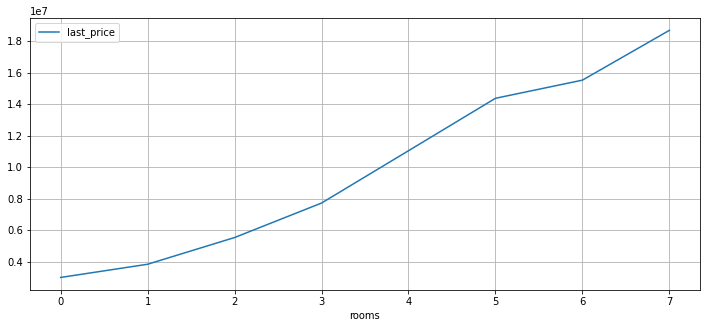

In [26]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5));

Существует близкая к линейной зависимость между ценой и количествов комнат вплоть до значений 7 комнат.

### Распределение зависимости типа этажа от стоимости объекта

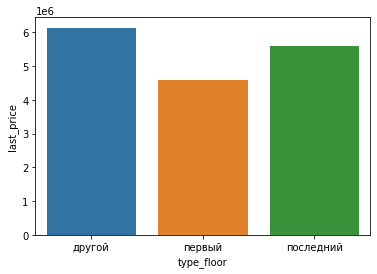

In [27]:
var_floor = data.pivot_table(index='type_floor', values='last_price').reset_index()
sns.barplot(data=var_floor,x='type_floor',y='last_price');

Наиболее дешевые предложения на первом этаже, а более дорогие на последнем. 

### График зависимости стоимости объекта от даты размещения

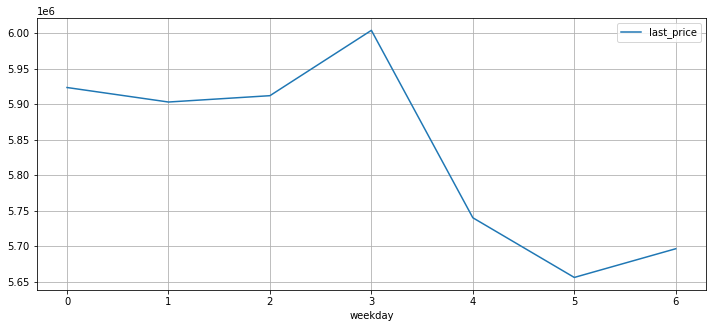

In [28]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5));

На графике видно,что самые дешевые предложения выставлялись в СБ и ВС. Самые дорогие в ЧТ.

### График зависимости стоимости объекта от месяца размещения

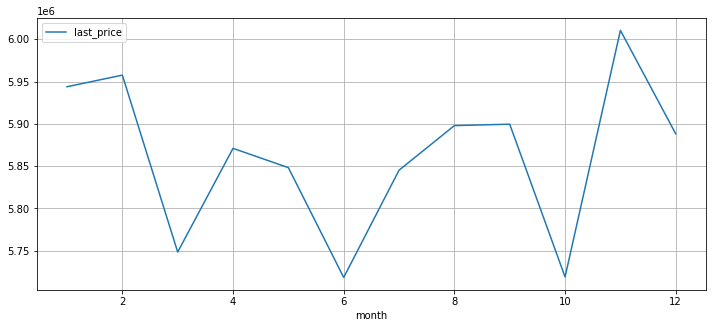

In [29]:
data.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5));

Средняя цена предложения нестабильно в течение года. Пики средней цены приходятся на ноябрь, февраль. В остальные месяцы наблюдаются пики низкой цены. 

### График зависимости стоимости объекта от года размещения объявления

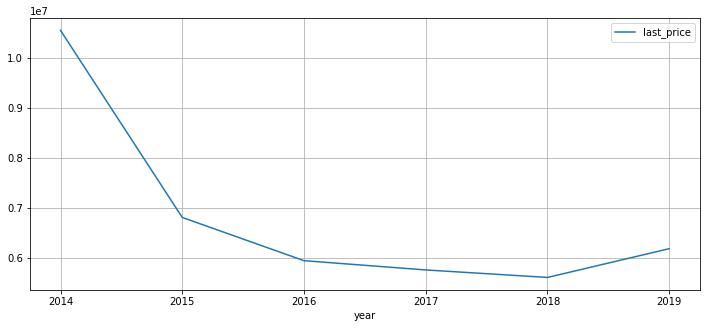

In [30]:
data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5));

С начала наблюдений в 2014 году средняя цена неуклонно снижалась, лишь немного поднявшись в 2019 году. 

In [31]:
matr_data = data[['total_area','living_area','kitchen_area','rooms','last_price']]
print(matr_data.corr())

              total_area  living_area  kitchen_area     rooms  last_price
total_area      1.000000     0.930096      0.604966  0.789554    0.764288
living_area     0.930096     1.000000      0.383169  0.863114    0.658519
kitchen_area    0.604966     0.383169      1.000000  0.255273    0.605828
rooms           0.789554     0.863114      0.255273  1.000000    0.467851
last_price      0.764288     0.658519      0.605828  0.467851    1.000000


### Средняя цена площади в 10 наиболее популярных населенных пунктах

In [32]:
list_friq = data.groupby('locality_name')['per_metr'].count().sort_values(ascending=False) #список 10 самых частых обьявлений
list_per_metr = data.groupby('locality_name')['per_metr'].mean() # средняя цена за метр в населенном пункте
result = pd.merge(list_per_metr,list_friq, on='locality_name').sort_values('per_metr_y',ascending=False)
print(result[0:1])
print()
print(result[9:10])

                    per_metr_x  per_metr_y
locality_name                             
санкт-петербург  112261.449398       15454

                 per_metr_x  per_metr_y
locality_name                          
выборг         58141.919831         237


Самое большое количество объявлений представлено в Санкт-Петербурге - 15721 объявления. Средняя цена квадратного метра - около 115 тыс.руб. за 1 кв.м. Замыкает десятку самых популярных объявлений Выборг, где цена квадратного метра примерно 58 тыс. за кв.м. 

### Зависимость средней цены за квадратный метр от отдаленности

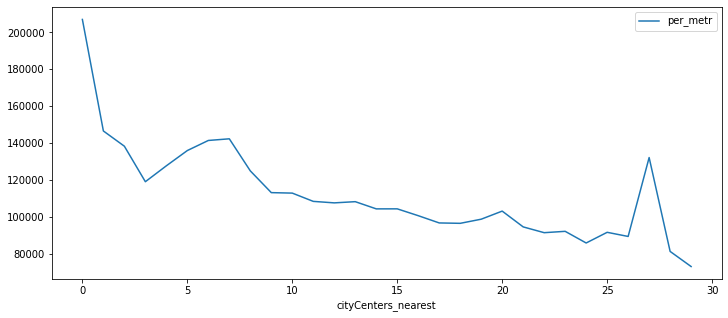

In [33]:
st_piter = data\
.query('(locality_name=="санкт-петербург") and (cityCenters_nearest>=0)')\
.pivot_table(index='cityCenters_nearest', values='per_metr')\
.plot(figsize=(12, 5))

С увеличением отдаления от центра прослеживается нелинейная тенденция к снижению стоимости квадратного метра. Незначительные отклонения от нисходящего тренда наблюдаются в районе 7 км и 27 км от центра. 

## Общий вывод

Для анализа информации был получен датафрейм с информацией о сделках с недвижимостью в г.Санкт-Петербург и его окраинах. При просмотре данных было обнаружено отсутствие значений в ряде столбцов. В рамках подготовки к анализу были приведены работы по заполнению отсутствующих полей расчетными и медианными значениями. Типы данных приведены к соответствию. Из датафрейма исключены предложения с ценой более 50млн.рублей, площадью более 200 кв.м. и количеством комнат более 7. После исключения обьем информации снизился на 1.2%, что не оказывает влияния на общий результат. Для повышения качества данных необходимо внести шаблон с выпадающим списком для ввода населенного пункта, а также настроить корректное вычисление расстояния до парков и водоемов. 


   Основная масса предложений имеет жилую площадь до 60кв.м. В диапазоне от 60 до 170 кв.м. представлено мало предложений.
Количество предложений одно- и двухкомантных квартир одинаково. Немного меньше предложений трехкомнтаных квартир. Большиство квартир имеют потолки 2.5-2.8 метра. Намного реже встречаются квартиры с потолками высотой 3м. Самое большое предложение квартир располагается в диапазоне от 12 до 16 км. от центра, что связано с застройкой окраин города. Дальше 18 км. резко сокращается количество предложений. При рассмотрении цены за 1 кв.м. прослеживается нелинейная тенденция к снижению стоимости квадратного метра с увеличением отдаления от центра. Незначительные аномалии от нисходящего тренда наблюдаются в районе 7 км и 27 км от центра. Стоимость квартиры коррелирует с площадью квартиры, а также с производными общей площади: жилой площадью, площадью кухни. При покупке квартиры в г.Санкт-Петербург следует оринтироваться на медианное значение в 112 тыс.руб. за квадратный метр. Десятку самых распространенных объявлений занимает г.Выборг с ценой 58 тыс. руб. за квадратный метр. Средняя стоимость жилья снижалась с 2014 года, немного поднявшись лишь в 2019 году. 

При анализе объявлений выявлено, что наименее активно размещают объявления в январе и мае, а чаще всего в феврале, марте, апреле и ноябре. Средняя цена предложения нестабильна в течение года. Пики средней цены приходятся на ноябрь, февраль. В остальные месяцы наблюдаются пики низкой цены. Самые дешевые предложения выставлялись в СБ и ВС. Самые дорогие в ЧТ. Большая часть объявлений снималась с размещения по истечении полугода, при этом в первые месяцы была наибольшая доля продаж. Среднее арифмитическое значение продажи равно 180 дням, а медианное 95 дням. Быстрой продажей можно назвать срок до 200 дней, а все что дольше - долгой. Выявлены пики закрытия обьявлений спустя 40 и 60 дней с момента начала продажи. 